In [3]:
# 1) Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [4]:
#2) Read and display the dataset (Eg: - Head and tail functions)
# Load dataset
data = pd.read_csv('data2.csv')

# Display the first and last few rows of the dataset
print(data.head())
print(data.tail())


  Profession  Income   Credit_card_number Expiry  Security_code  Fraud
0     DOCTOR   42509     3515418493460774  07/25            251      1
1     DOCTOR   80334      213134223583196  05/32            858      1
2     LAWYER   91552     4869615013764888  03/30            755      1
3     LAWYER   43623      341063356109385  01/29            160      1
4     DOCTOR   22962  4707418777543978402  11/30            102      0
     Profession  Income  Credit_card_number Expiry  Security_code  Fraud
9995     DOCTOR    2705        502092127427  09/27            422      1
9996     LAWYER   37862     349490624391408  07/34            811      0
9997   ENGINEER   83152    4990903961714432  11/24            216      1
9998     DOCTOR   90620    4827611166572112  01/33            180      1
9999     LAWYER   94529    4906715586330631  12/29            399      1


In [ ]:
# 3)Sanity check of the data (Row column info, to check outliers, missing values*, find duplicates, etc...)

# Basic information about the dataset
print(data.info())
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Checking for duplicates
print("Number of duplicate rows:", data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB
None
            Income  Credit_card_number  Security_code         Fraud
count  10000.00000        1.000000e+04   10000.000000  10000.000000
mean   49761.20600        3.851363e+17     863.587800      0.501600
std    28837.72928        1.257950e+18    1484.424959      0.500022
min        1.00000        6.040296e+10       0.000000      0.000000
25%    24863.75000        1.800137e+14     275.000000      0.000000
50%    49483.00000        3.512440e+15     5

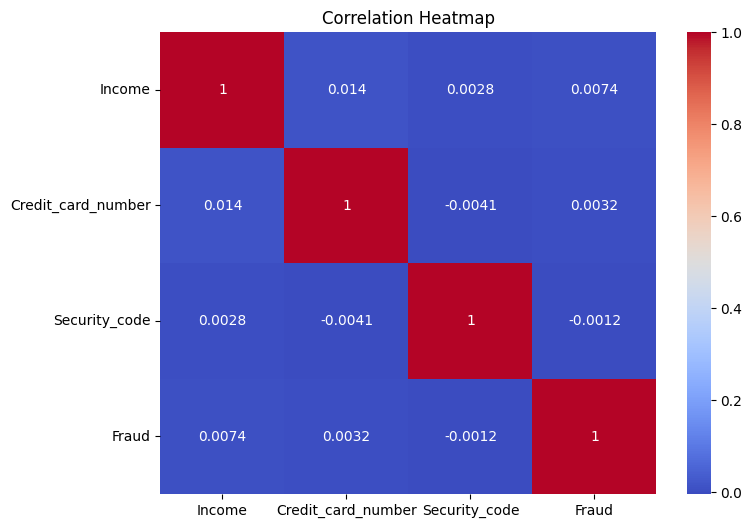

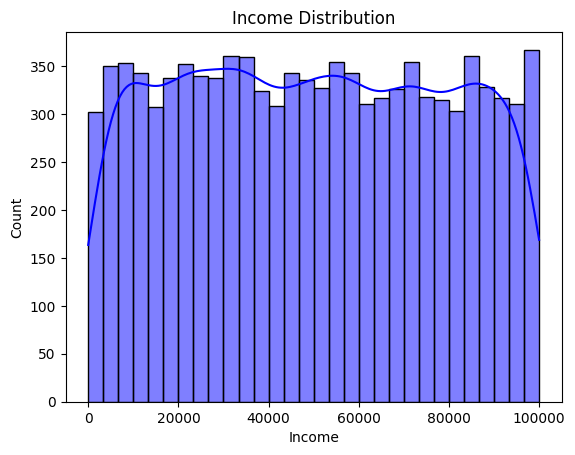

/tmp/ipykernel_6586/2207056998.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud', data=data, palette='Set2')


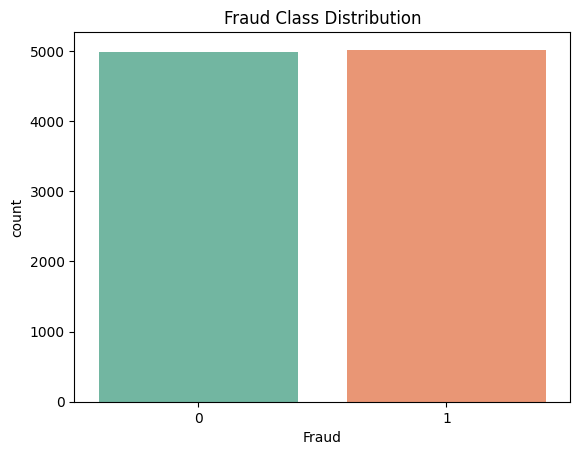

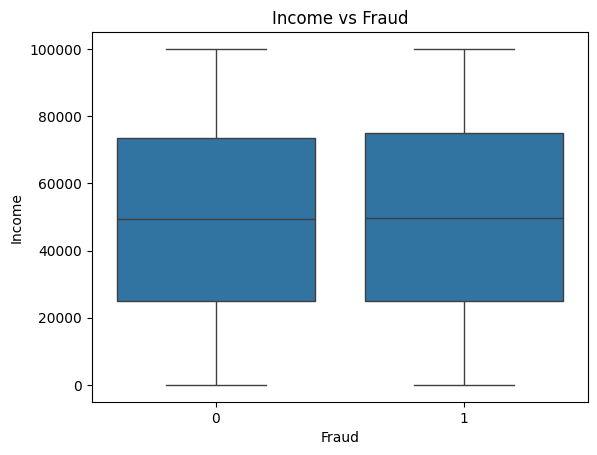

In [7]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Income
sns.histplot(data['Income'], kde=True, bins=30, color='blue')
plt.title("Income Distribution")
plt.show()

# Fraud count visualization
sns.countplot(x='Fraud', data=data, palette='Set2')
plt.title("Fraud Class Distribution")
plt.show()

# Income vs Fraud
sns.boxplot(x='Fraud', y='Income', data=data)
plt.title("Income vs Fraud")
plt.show()


In [9]:
# Introducing artificial missing values
data.loc[5:10, 'Income'] = np.nan

# Option 1: Fill with mean
data['Income'].fillna(data['Income'].mean(), inplace=True)

# Option 2: Fill with median
# data['Income'].fillna(data['Income'].median(), inplace=True)


/tmp/ipykernel_8745/4039232045.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].mean(), inplace=True)


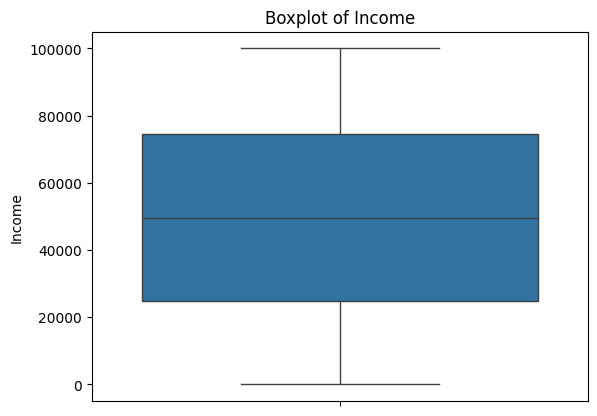

In [10]:
# Visualize outliers in Income
sns.boxplot(data['Income'])
plt.title("Boxplot of Income")
plt.show()

# Treating outliers using capping
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Income'] = np.where(data['Income'] > upper_bound, upper_bound, data['Income'])
data['Income'] = np.where(data['Income'] < lower_bound, lower_bound, data['Income'])


In [11]:
# Dropping duplicates
data.drop_duplicates(inplace=True)

# Checking for garbage values in categorical columns
print(data['Profession'].unique())


['DOCTOR' 'LAWYER' 'ENGINEER']


In [12]:
# Standardizing Income
scaler = StandardScaler()
data['Income'] = scaler.fit_transform(data[['Income']])


In [13]:
# Encoding categorical variables
encoder = LabelEncoder()
data['Profession'] = encoder.fit_transform(data['Profession'])


In [14]:
# Separating features and target variable
X = data.drop(['Fraud', 'Credit_card_number', 'Expiry', 'Security_code'], axis=1)
y = data['Fraud']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Train-Test Split Completed!
X_train shape: (8000, 2)
X_test shape: (2000, 2)
